<a href="https://colab.research.google.com/github/aydnagha/aydnagha/blob/main/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/neft',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(640, 640),
  batch_size=4)

Found 296 files belonging to 3 classes.
Using 237 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/neft',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(640, 640),
  batch_size=4)

Found 296 files belonging to 3 classes.
Using 59 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['goyqursaqi', 'parlaq', 'qara_neft']


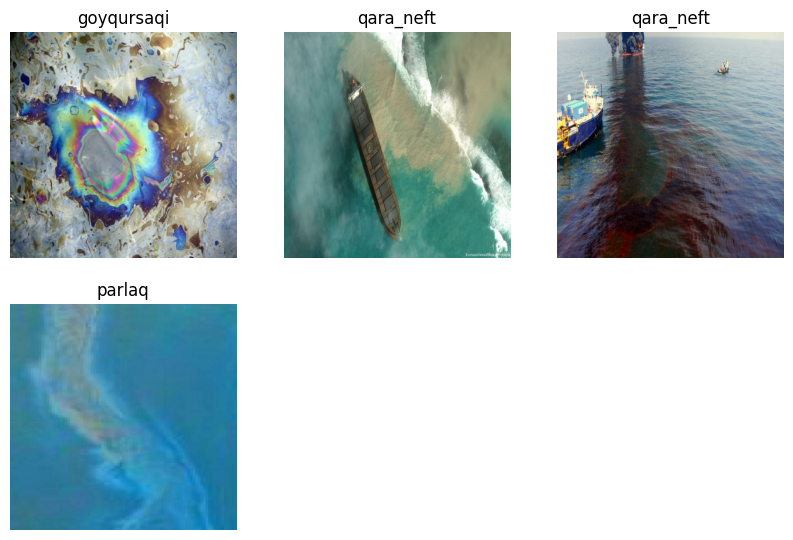

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(5):
  for i in range(4):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(4, 640, 640, 3)
(4,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03529412 0.90196085


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(4, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(4, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(4, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=8
)

Epoch 1/8
60/60 [==============================] - 52s 699ms/step - loss: 1.0621 - accuracy: 0.4135 - val_loss: 1.1013 - val_accuracy: 0.3390
Epoch 2/8
60/60 [==============================] - 1s 23ms/step - loss: 0.9347 - accuracy: 0.6034 - val_loss: 1.0783 - val_accuracy: 0.5763
Epoch 3/8
60/60 [==============================] - 1s 21ms/step - loss: 0.6954 - accuracy: 0.8228 - val_loss: 1.1124 - val_accuracy: 0.6271
Epoch 4/8
60/60 [==============================] - 1s 21ms/step - loss: 0.5065 - accuracy: 0.8945 - val_loss: 1.1322 - val_accuracy: 0.5763
Epoch 5/8
60/60 [==============================] - 1s 21ms/step - loss: 0.3746 - accuracy: 0.9114 - val_loss: 1.3986 - val_accuracy: 0.5932
Epoch 6/8
60/60 [==============================] - 1s 18ms/step - loss: 0.1927 - accuracy: 0.9705 - val_loss: 1.0529 - val_accuracy: 0.6271
Epoch 7/8
60/60 [==============================] - 1s 16ms/step - loss: 0.1197 - accuracy: 0.9831 - val_loss: 1.1704 - val_accuracy: 0.6780
Epoch 8/8
60/60 [=

In [ ]:
model.evaluate(val_ds)

15/15 [==============================] - 0s 11ms/step - loss: 0.9725 - accuracy: 0.6441


[0.9724713563919067, 0.6440678238868713]

In [ ]:
video = cv2.VideoCapture('/content/video.mp4')


while True:
    ret, frame = video.read()


    if not ret:
        break


    input_tensor = cv2.resize(frame, (640, 640))
    input_tensor = tf.keras.preprocessing.image.img_to_array(input_tensor)
    input_tensor = tf.keras.applications.mobilenet_v2.preprocess_input(input_tensor)
    input_tensor = tf.expand_dims(input_tensor, axis=0)
    predictions = model.predict(input_tensor)



Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 39ms/step


In [ ]:
predictions

NameError: ignored